In [19]:
"""
cfg.py 

Simulation configuration for S1 model (using NetPyNE)
This file has sim configs as well as specification for parameterized values in netParams.py 

Contributors: salvadordura@gmail.com, fernandodasilvaborges@gmail.com
"""
# import matplotlib
from netpyne import specs, sim

%matplotlib inline

cfg = specs.SimConfig()  

cfg.duration = 5.0*1e2 ## Duration of the sim, in ms  
cfg.dt = 0.0025
cfg.seeds = {'conn': 4321, 'stim': 4321, 'loc': 4321} 
cfg.hParams = {'celsius': 34, 'v_init': -71}  
cfg.verbose = False
cfg.createNEURONObj = True
cfg.createPyStruct = True  

In [20]:
#--------------------------------------------------------------------------
# Recording 
#--------------------------------------------------------------------------

cellName = 'L23_PC_cADpyr_1' # L23_PC_cADpyr_1_cellParams.json

cfg.allpops = [cellName]

cfg.recordCells = cfg.allpops # record all cells                
cfg.recordTraces = {'V_soma': {'sec':'soma_0', 'loc':0.5, 'var':'v'},
                    'V_axon_0': {'sec':'axon_0', 'loc':0.5, 'var':'v'},
                    'V_Myelin_0': {'sec':'Myelin_0', 'loc':0.5, 'var':'v'},
                    'V_Myelin_10': {'sec':'Myelin_10', 'loc':0.5, 'var':'v'},
                    'V_Node_0': {'sec':'Node_0', 'loc':0.5, 'var':'v'},
                    'V_Node_10': {'sec':'Node_10', 'loc':0.5, 'var':'v'},
                    'V_Unmyelin_0': {'sec':'Unmyelin_0', 'loc':0.5, 'var':'v'},
                    'V_Unmyelin_10': {'sec':'Unmyelin_10', 'loc':0.5, 'var':'v'},
                    'V_apic_0': {'sec':'apic_0', 'loc':0.5, 'var':'v'},
                    'V_apic_5': {'sec':'apic_5', 'loc':0.5, 'var':'v'},
                    'V_apic_95': {'sec':'apic_95', 'loc':0.5, 'var':'v'},                
                    'V_dend_5': {'sec':'dend_5', 'loc':0.5, 'var':'v'},
                    'V_dend_65': {'sec':'dend_65', 'loc':0.5, 'var':'v'},
                    'V_Node_113': {'sec':'Node_113', 'loc':0.5, 'var':'v'},
                    }

cfg.recordStim = True
cfg.recordTime = True
cfg.recordStep = 0.0025  

cfg.analysis['plotTraces'] = {'include': cfg.recordCells, 'oneFigPer': 'cell', 'overlay': True, 'timeRange': [0,cfg.duration], 'saveFig': True, 'showFig': False, 'figSize':(18,12)}


In [21]:
#------------------------------------------------------------------------------
# Saving
#------------------------------------------------------------------------------
cfg.simLabel = cellName
cfg.saveFolder = '../data/singleCelltest/'+cfg.simLabel
cfg.savePickle = False         	## Save pkl file
cfg.saveJson = False	           	## Save json file
cfg.saveDataInclude = ['simData'] ## , 'netParams', 'simConfig', ,'simData'
cfg.backupCfgFile = None
cfg.gatherOnlySimData = False
cfg.saveCellSecs = True
cfg.saveCellConns = True

In [22]:
"""
netParams.py
"""
# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

netParams.scale = 1.0 # Scale factor for number of cells
netParams.sizeX = 420.0 # x-dimension (horizontal length) size in um
netParams.sizeY = 1082.0 # y-dimension (vertical height or cortical depth) size in um
netParams.sizeZ = 420.0 # z-dimension (horizontal depth) size in um
netParams.shape = 'cylinder' # cylindrical (column-like) volume

# r = 210 um and hexagonal side length = 230.9 um

In [23]:
#------------------------------------------------------------------------------
# General connectivity parameters
#------------------------------------------------------------------------------
netParams.defaultThreshold = -10.0 # spike threshold, 10 mV is NetCon default, lower it for all cells
netParams.defaultDelay = 0.1 # default conn delay (ms)
netParams.propVelocity = 300.0 #  300 μm/ms (Stuart et al., 1997)
netParams.scaleConnWeightNetStims = 0.001  # weight conversion factor (from nS to uS)

In [24]:
#------------------------------------------------------------------------------
# Population parameters
#------------------------------------------------------------------------------

netParams.popParams[cellName] = {'cellType': cellName, 'cellModel': 'HH_full', 'numCells': 1}
netParams.loadCellParamsRule(label = cellName, fileName = 'cells/'+cellName+'_cellParams.json') 
netParams.cellParams[cellName]['conds']['cellType'] = cellName


In [25]:
for sec in netParams.cellParams[cellName]['secs'].keys():
    if netParams.cellParams[cellName]['secs'][sec]['geom']['diam'] > 100:
        print(sec)
        print(netParams.cellParams[cellName]['secs'][sec]['geom']['pt3d'])


In [26]:
# if cellName == 'L5_TTPC2_cADpyr_1': # this cell has 'Node_113' 'diam' = 1000.0 
#     netParams.cellParams[cellName]['secs']['Node_113']['geom']['diam'] = 10.0
#     netParams.cellParams[cellName]['secs']['Node_113']['geom']['pt3d'] = [(-22.136661529541016, -6.852905750274658, -709.5120239257812, 10.0),
#     (-22.494400024414062, -7.216529846191406, -710.219970703125, 10.0),
#     (-22.545791625976562, -7.267182350158691, -710.3250122070312, 10.0)]

# if cellName == 'L6_TPC_L4_cADpyr_1': # this cell has 'Node_11' 'diam' = 1000.0 
#     netParams.cellParams[cellName]['secs']['Node_11']['geom']['diam'] = 10.0
#     netParams.cellParams[cellName]['secs']['Node_11']['geom']['pt3d'] = [[-9.777837753295898, -820.4423828125, 96.71197509765625, 10.0], [-10.025091171264648, -821.166015625, 97.35637664794922, 10.0]]

## Stimulation

In [27]:
from stimulation import make_extracellular_stimuli
from tms_tools import apply_tms

tms = 1

#------------------------------------------------------------------------
# External Stimulation
#------------------------------------------------------------------------------

cfg.addExternalStimulation = True

# The parameters of the extracellular point current source
cfg.acs_params = {'position': [0.0, -1710.0, 0.0],  # um # y = [pia, bone]
              'amp': -1250.,  # uA,
              'stimstart': 300,  # ms
              'stimend': 400.0,  # ms
              'frequency': 5,  # Hz
              'sigma': 0.57  # decay constant S/m
              }

cfg.tms_params = dict(
    freq_Hz=30.,
    duration_ms=cfg.duration,
    pulse_resolution_ms=cfg.dt,
    stim_start_ms=300.,
    stim_end_ms=400.,
    ef_amp_V_per_m=80.,
    width_ms=0.1,
    pshape="Sine",
    decay_rate_percent_per_mm=10,
    E_field_dir=[-1, -1, -1],
    decay_dir=[0, 0, -1],
    ref_point_um=[0, 0, 0],
)


## Run small Nets in a sigle job


Start time:  2024-09-27 12:09:25.965364




Creating network of 1 cell populations on 1 hosts...: 100%|##########|


  Number of cells on node 0: 1 
  Done; cell creation time = 0.15 s.
Making connections...
  Number of connections on node 0: 0 
  Done; cell connection time = 0.00 s.
  Number of stims on node 0: 0 
  Done; cell stims creation time = 0.00 s.
Recording 13 traces of 13 types on node 0
Applying TMS to network...

Running simulation using NEURON for 500.0 ms...
  Done; run time = 691.79 s; real-time ratio: 0.00.

Gathering data...
  Done; gather time = 0.24 s.

Analyzing...
  Cells: 1
  Connections: 0 (0.00 per cell)
  Spikes: 0 (0.00 Hz)
  Simulated time: 0.5 s; 1 workers
  Run time: 691.79 s
Plotting recorded cell traces ... cell

There was an exception in plotTraces()
  Done; plotting time = 1.59 s

Total time = 694.00 s


Traceback (most recent call last):
  File "/home/fernando/miniconda3/envs/p38/lib/python3.8/site-packages/netpyne/analysis/utils.py", line 75, in wrapper
    return function(*args, **kwargs)
  File "/home/fernando/miniconda3/envs/p38/lib/python3.8/site-packages/netpyne/analysis/traces.py", line 428, in plotTraces
    plt.savefig(filename)
  File "/home/fernando/miniconda3/envs/p38/lib/python3.8/site-packages/matplotlib/pyplot.py", line 1023, in savefig
    res = fig.savefig(*args, **kwargs)
  File "/home/fernando/miniconda3/envs/p38/lib/python3.8/site-packages/matplotlib/figure.py", line 3378, in savefig
    self.canvas.print_figure(fname, **kwargs)
  File "/home/fernando/miniconda3/envs/p38/lib/python3.8/site-packages/matplotlib/backend_bases.py", line 2366, in print_figure
    result = print_method(
  File "/home/fernando/miniconda3/envs/p38/lib/python3.8/site-packages/matplotlib/backend_bases.py", line 2232, in <lambda>
    print_method = functools.wraps(meth)(lambda *args, **kwargs

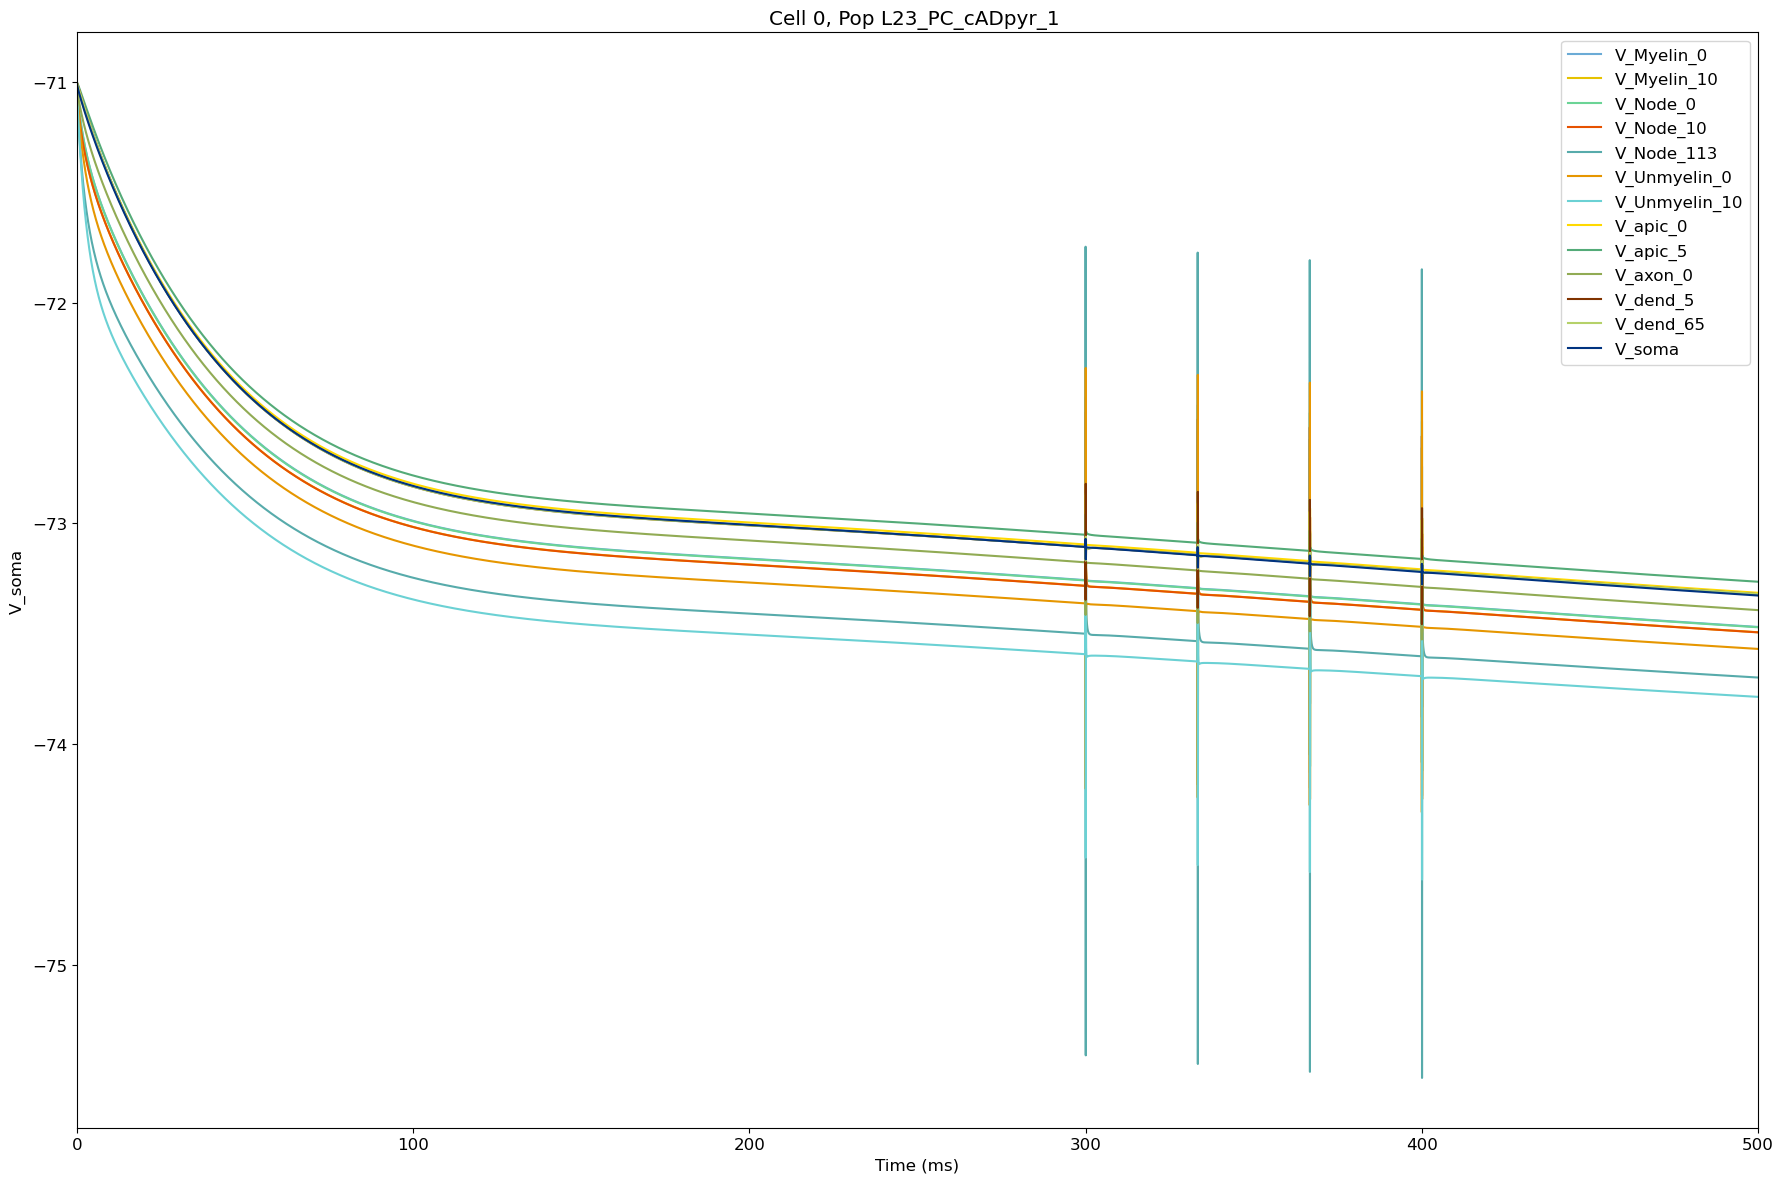

In [28]:
sim.initialize(
    simConfig = cfg, 	
    netParams = netParams)  				# create network object and set cfg and net params

sim.net.createPops()               			# instantiate network populations
sim.net.createCells();              			# instantiate network cells based on defined populations
sim.net.connectCells()            			# create connections between cells based on params
sim.net.addStims() 							# add network stimulation
sim.setupRecording()              			# setup variables to record for each cell (spikes, V traces, etc)
sim.net.defineCellShapes()

if cfg.addExternalStimulation:
    if tms:
        apply_tms(sim.net, **cfg.tms_params)
    else:
        #Add extracellular stim
        for c,metype in enumerate(sim.net.cells):
            if metype.tags['cellModel'] == 'HH_full':
                secList = [secs for secs in metype.secs.keys() if "pt3d" in metype.secs[secs]['geom']]
                print("\n", metype.tags, "nsec =",len(secList))
                # print(secList)
                v_cell_ext, cell = make_extracellular_stimuli(cfg.acs_params, metype, secList)

sim.runSim()                      			# run parallel Neuron simulation  

if cfg.addExternalStimulation:
    if tms:
        for cell in sim.net.cells:
            cell.t_ext.clear()
            cell.v_ext.clear()
    else:
        for c,metype in enumerate(sim.net.cells):
            if metype.tags['cellModel'] == 'HH_full':
                # print("\n", metype.tags)
                metype.t_ext.clear()
                metype.v_ext.clear()

sim.gatherData()                  			# gather spiking data and cell info from each node
sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
sim.analysis.plotData()  

## Traces

Plotting recorded cell traces ... cell


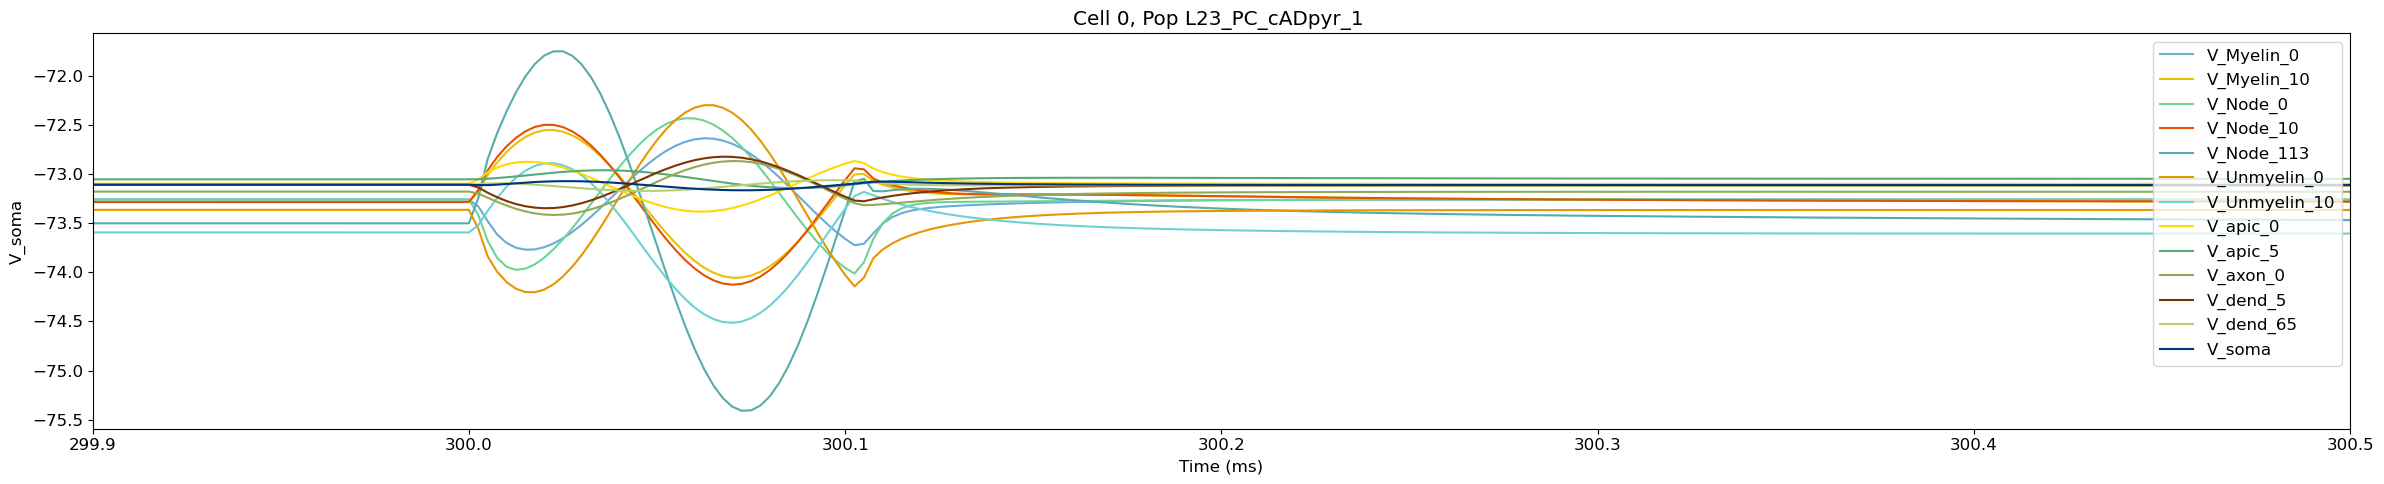

In [33]:
sim.analysis.plotTraces(timeRange=[299.9,300.5],figSize=(24,5), overlay=True);

Plotting recorded cell traces ... trace


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


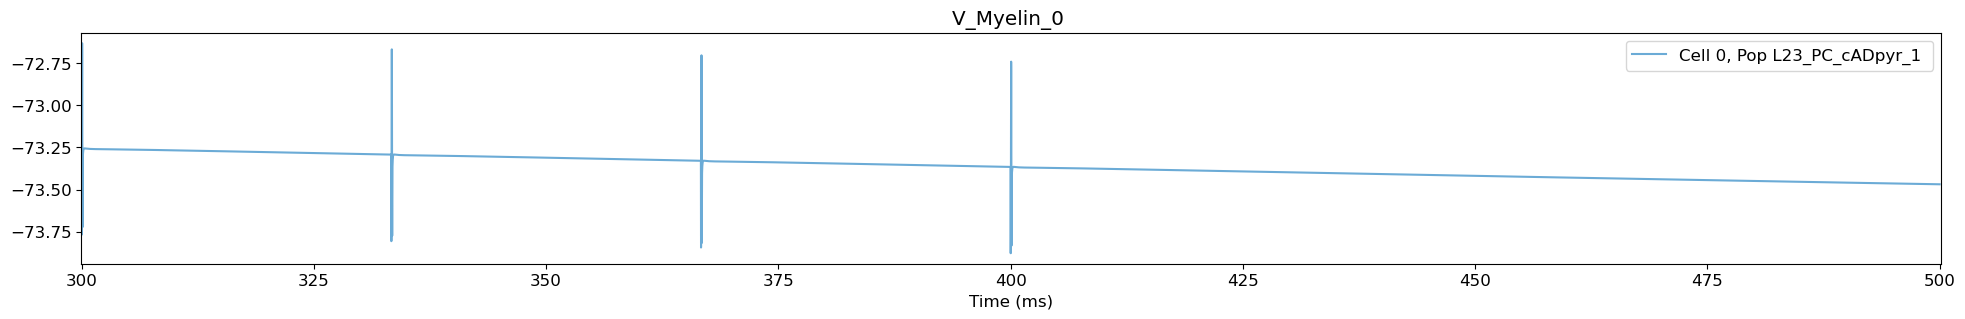

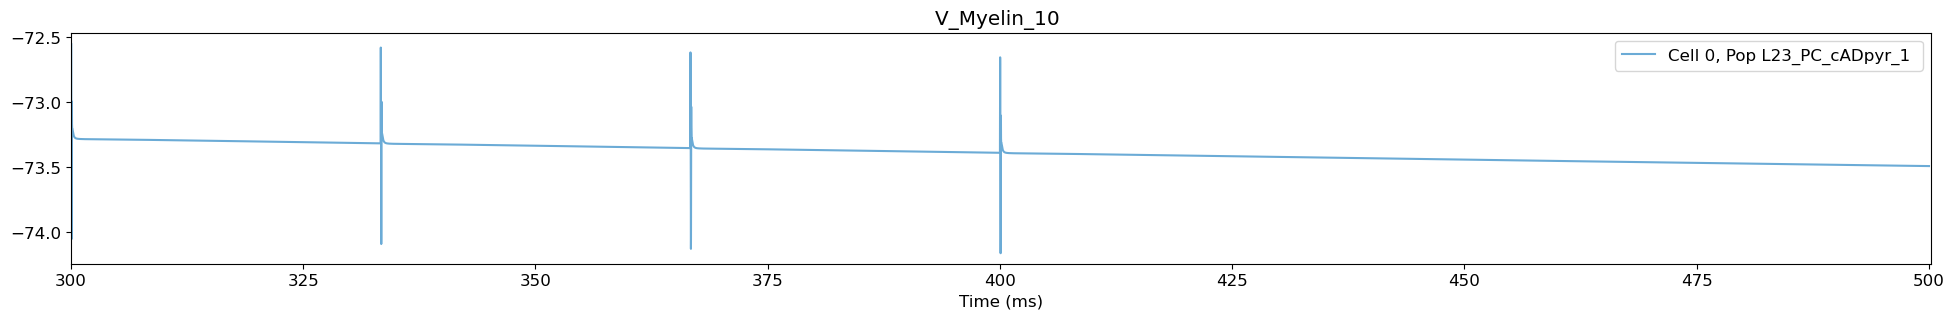

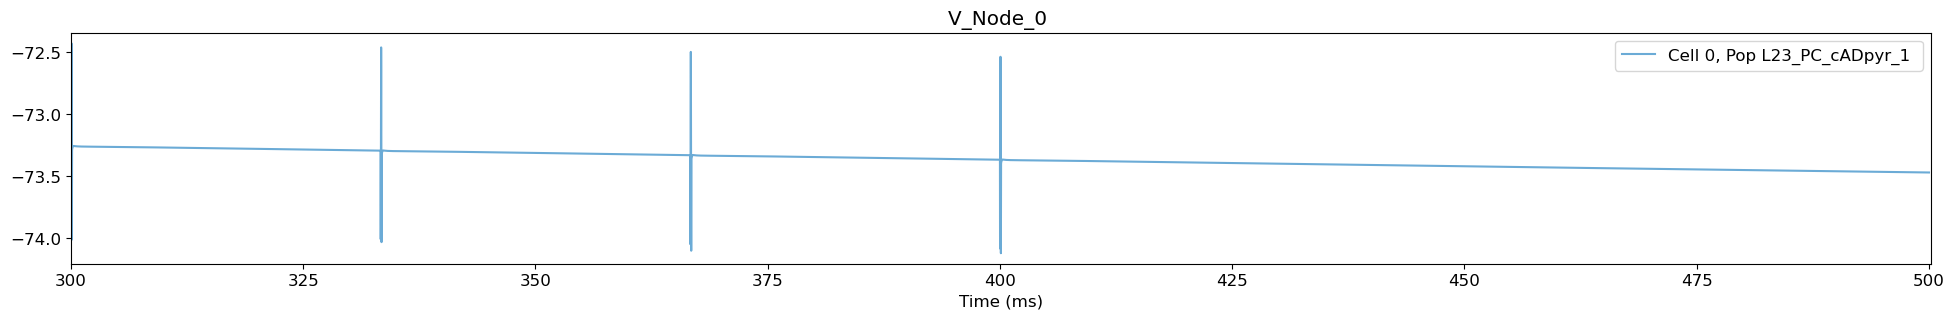

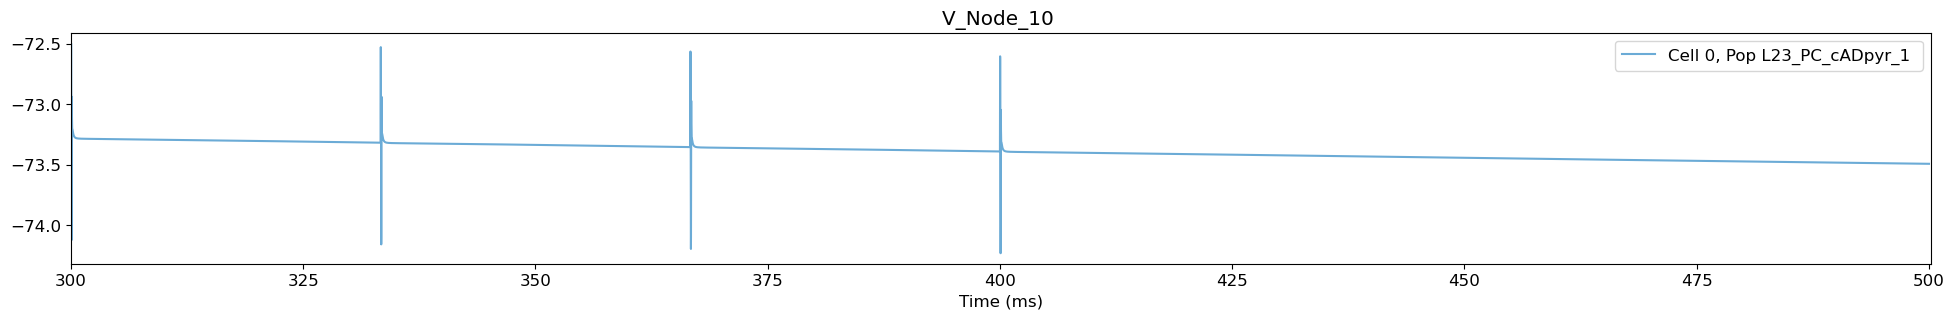

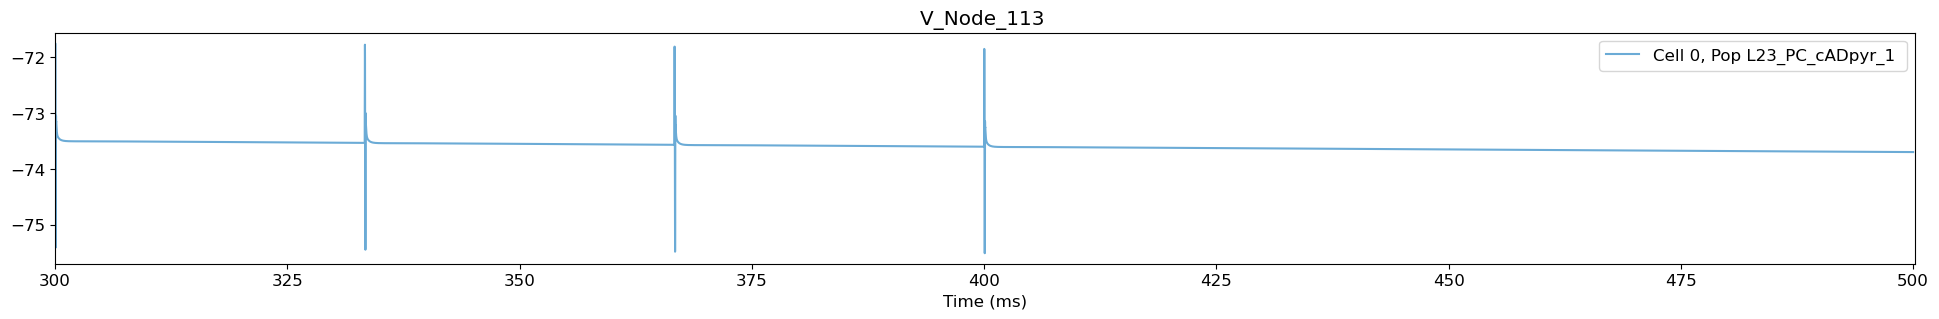

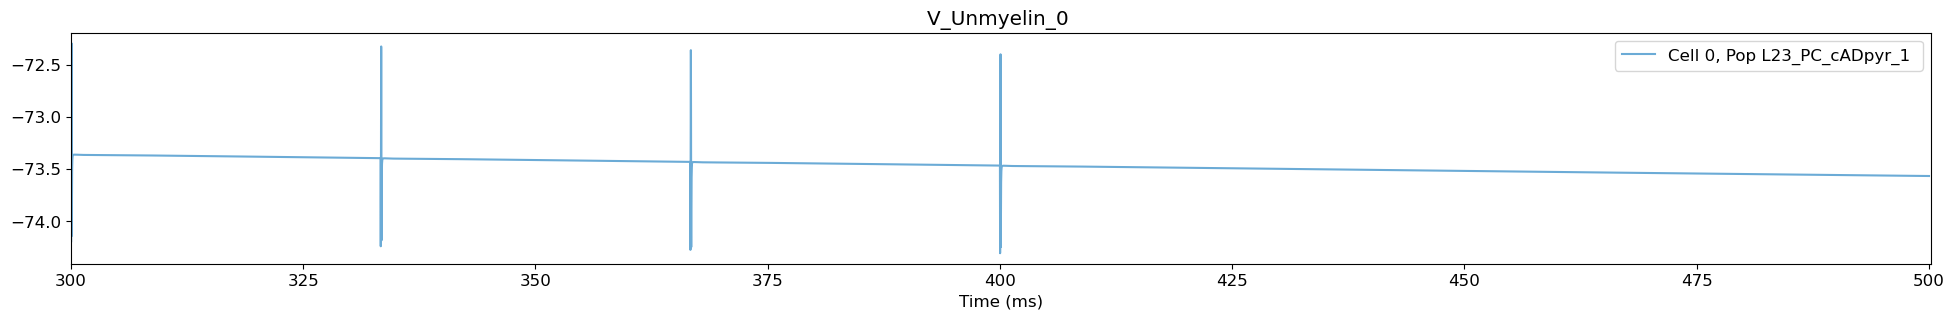

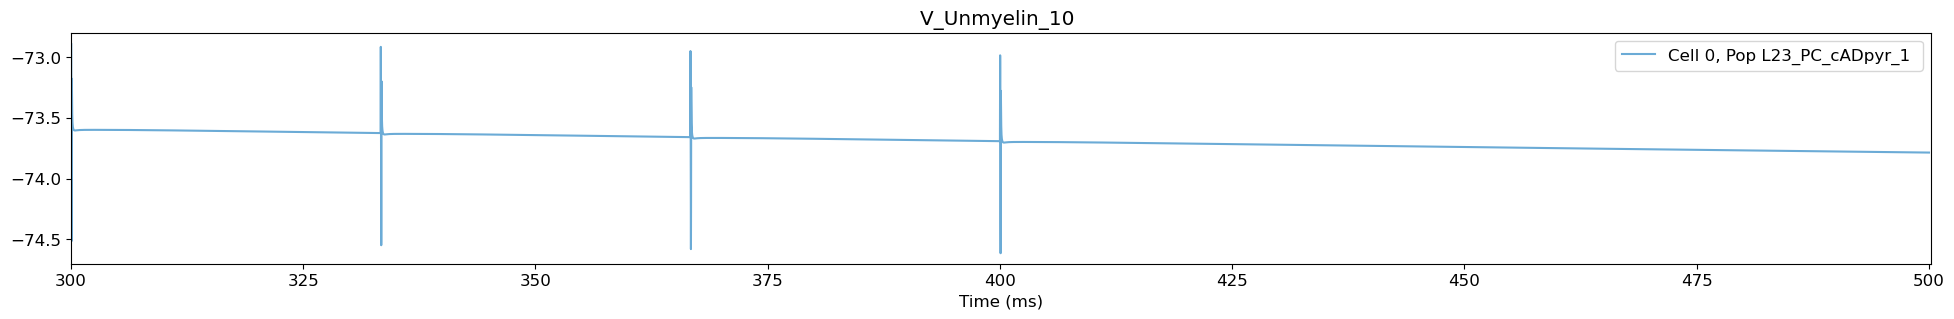

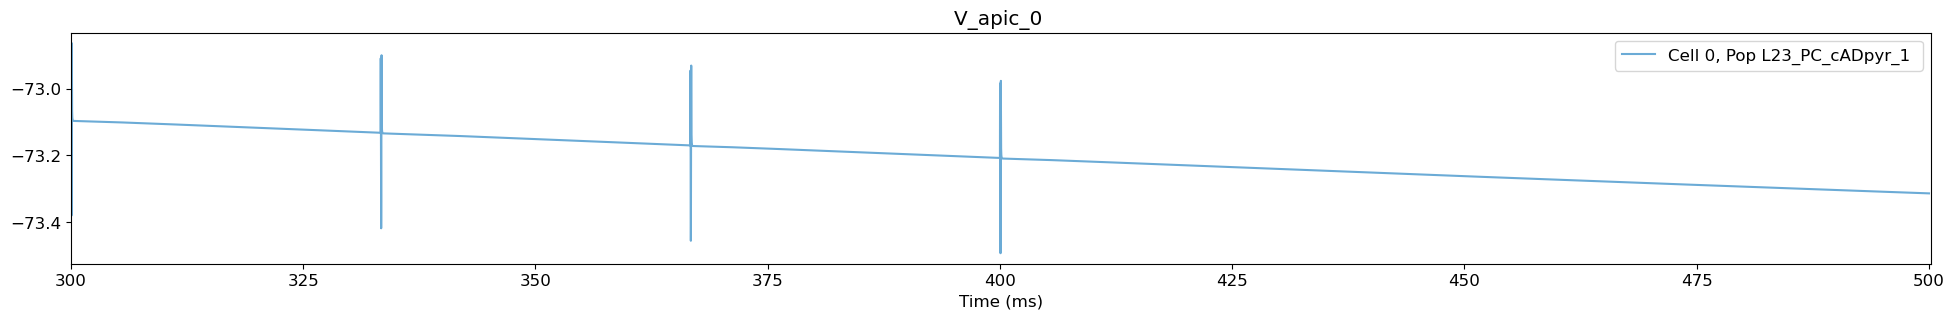

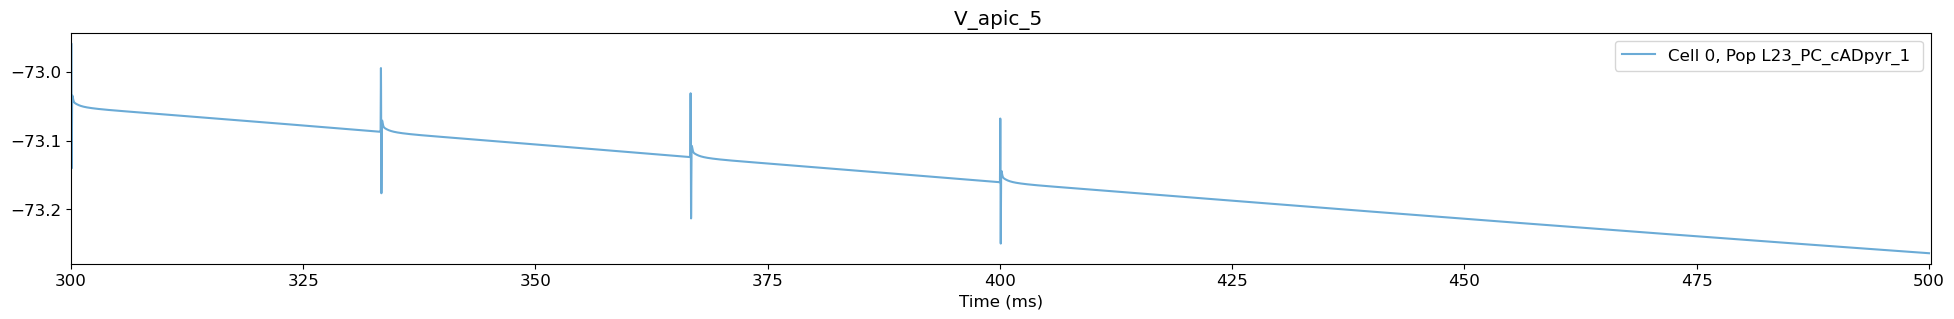

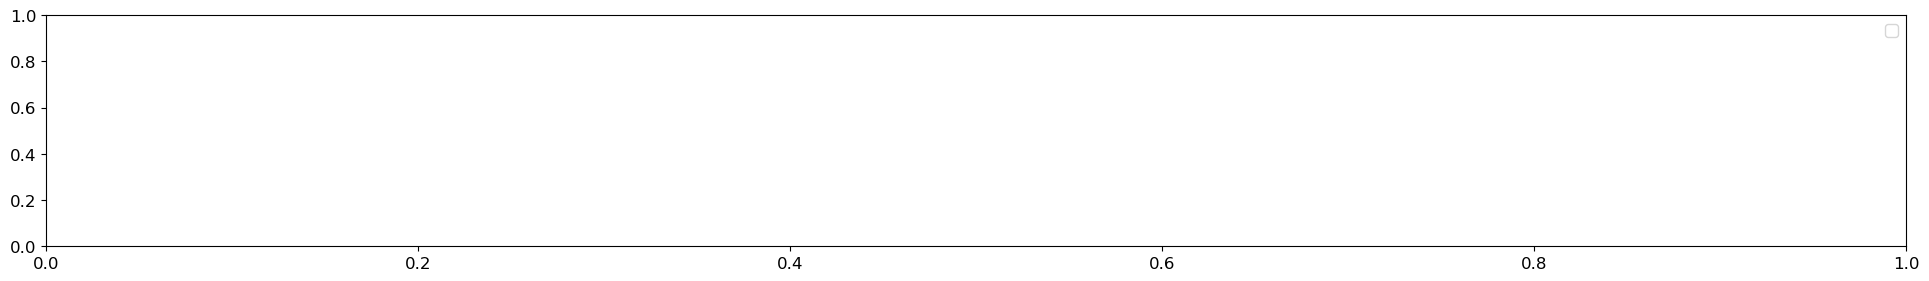

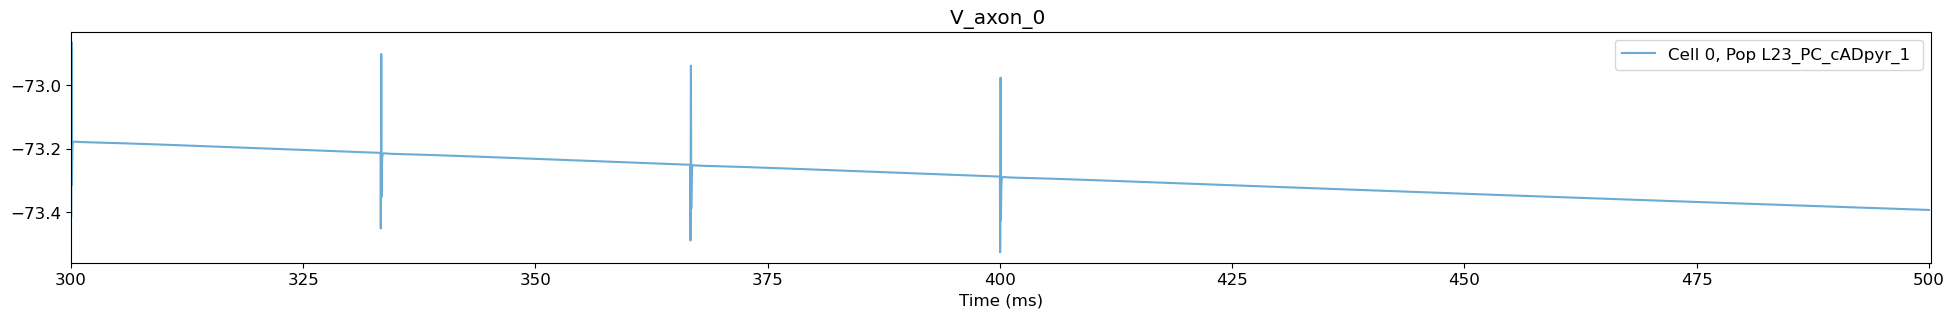

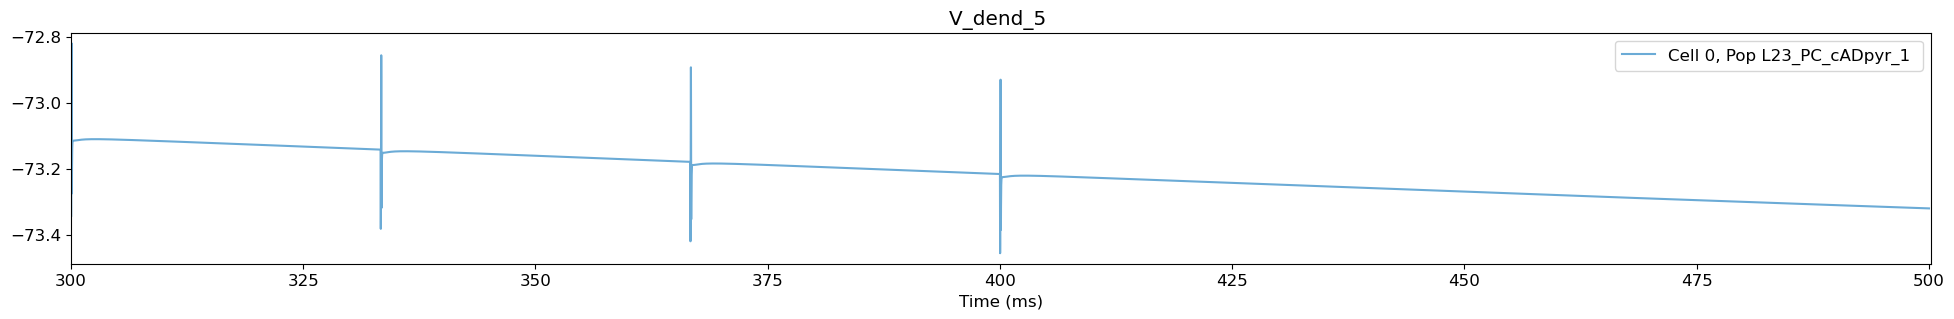

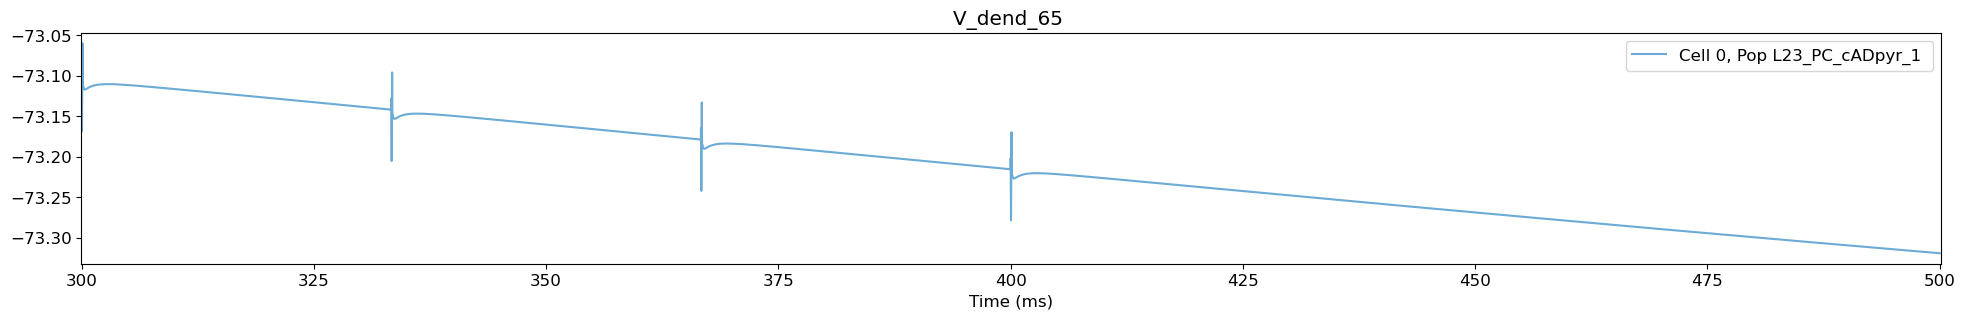

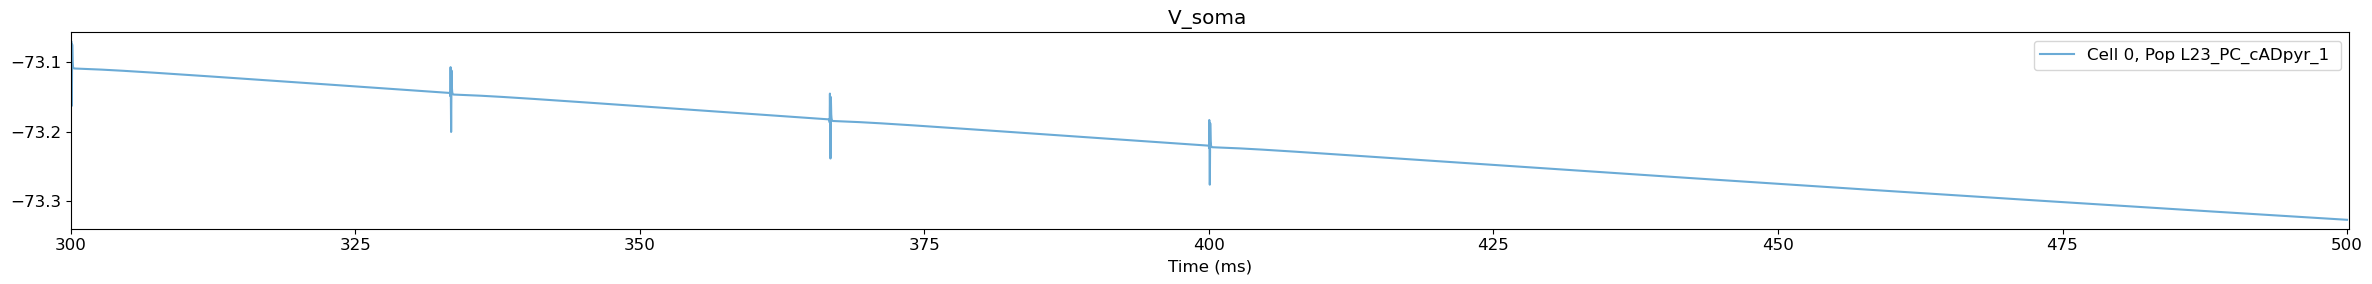

In [30]:
sim.analysis.plotTraces(timeRange=[299.99,500.2],figSize=(24,3), overlay=True, oneFigPer='trace');

Plotting 2D representation of network cell locations and connections...


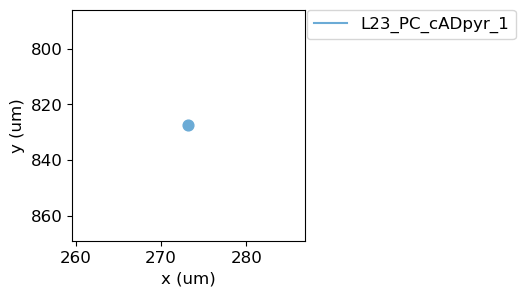

(<Figure size 300x300 with 1 Axes>,
 {'include': ['allCells'],
  'posX': [273.2018533459152],
  'posY': [827.4764172729392],
  'posXpre': [],
  'posXpost': [],
  'posYpre': [],
  'posYpost': []})

In [31]:
sim.analysis.plot2Dnet(figSize=(3,3))

Plotting 3D cell shape ...

There was an exception in plotShape()


Traceback (most recent call last):
  File "/home/fernando/miniconda3/envs/p38/lib/python3.8/site-packages/netpyne/analysis/utils.py", line 75, in wrapper
    return function(*args, **kwargs)
  File "/home/fernando/miniconda3/envs/p38/lib/python3.8/site-packages/netpyne/plotting/plotShape.py", line 280, in plotShape
    metaFig.finishFig(**kwargs)
  File "/home/fernando/miniconda3/envs/p38/lib/python3.8/site-packages/netpyne/plotting/plotter.py", line 363, in finishFig
    self.saveFig(**kwargs)
  File "/home/fernando/miniconda3/envs/p38/lib/python3.8/site-packages/netpyne/plotting/plotter.py", line 267, in saveFig
    self.fig.savefig(fileName)
  File "/home/fernando/miniconda3/envs/p38/lib/python3.8/site-packages/matplotlib/figure.py", line 3378, in savefig
    self.canvas.print_figure(fname, **kwargs)
  File "/home/fernando/miniconda3/envs/p38/lib/python3.8/site-packages/matplotlib/backend_bases.py", line 2366, in print_figure
    result = print_method(
  File "/home/fernando/minicon

-1

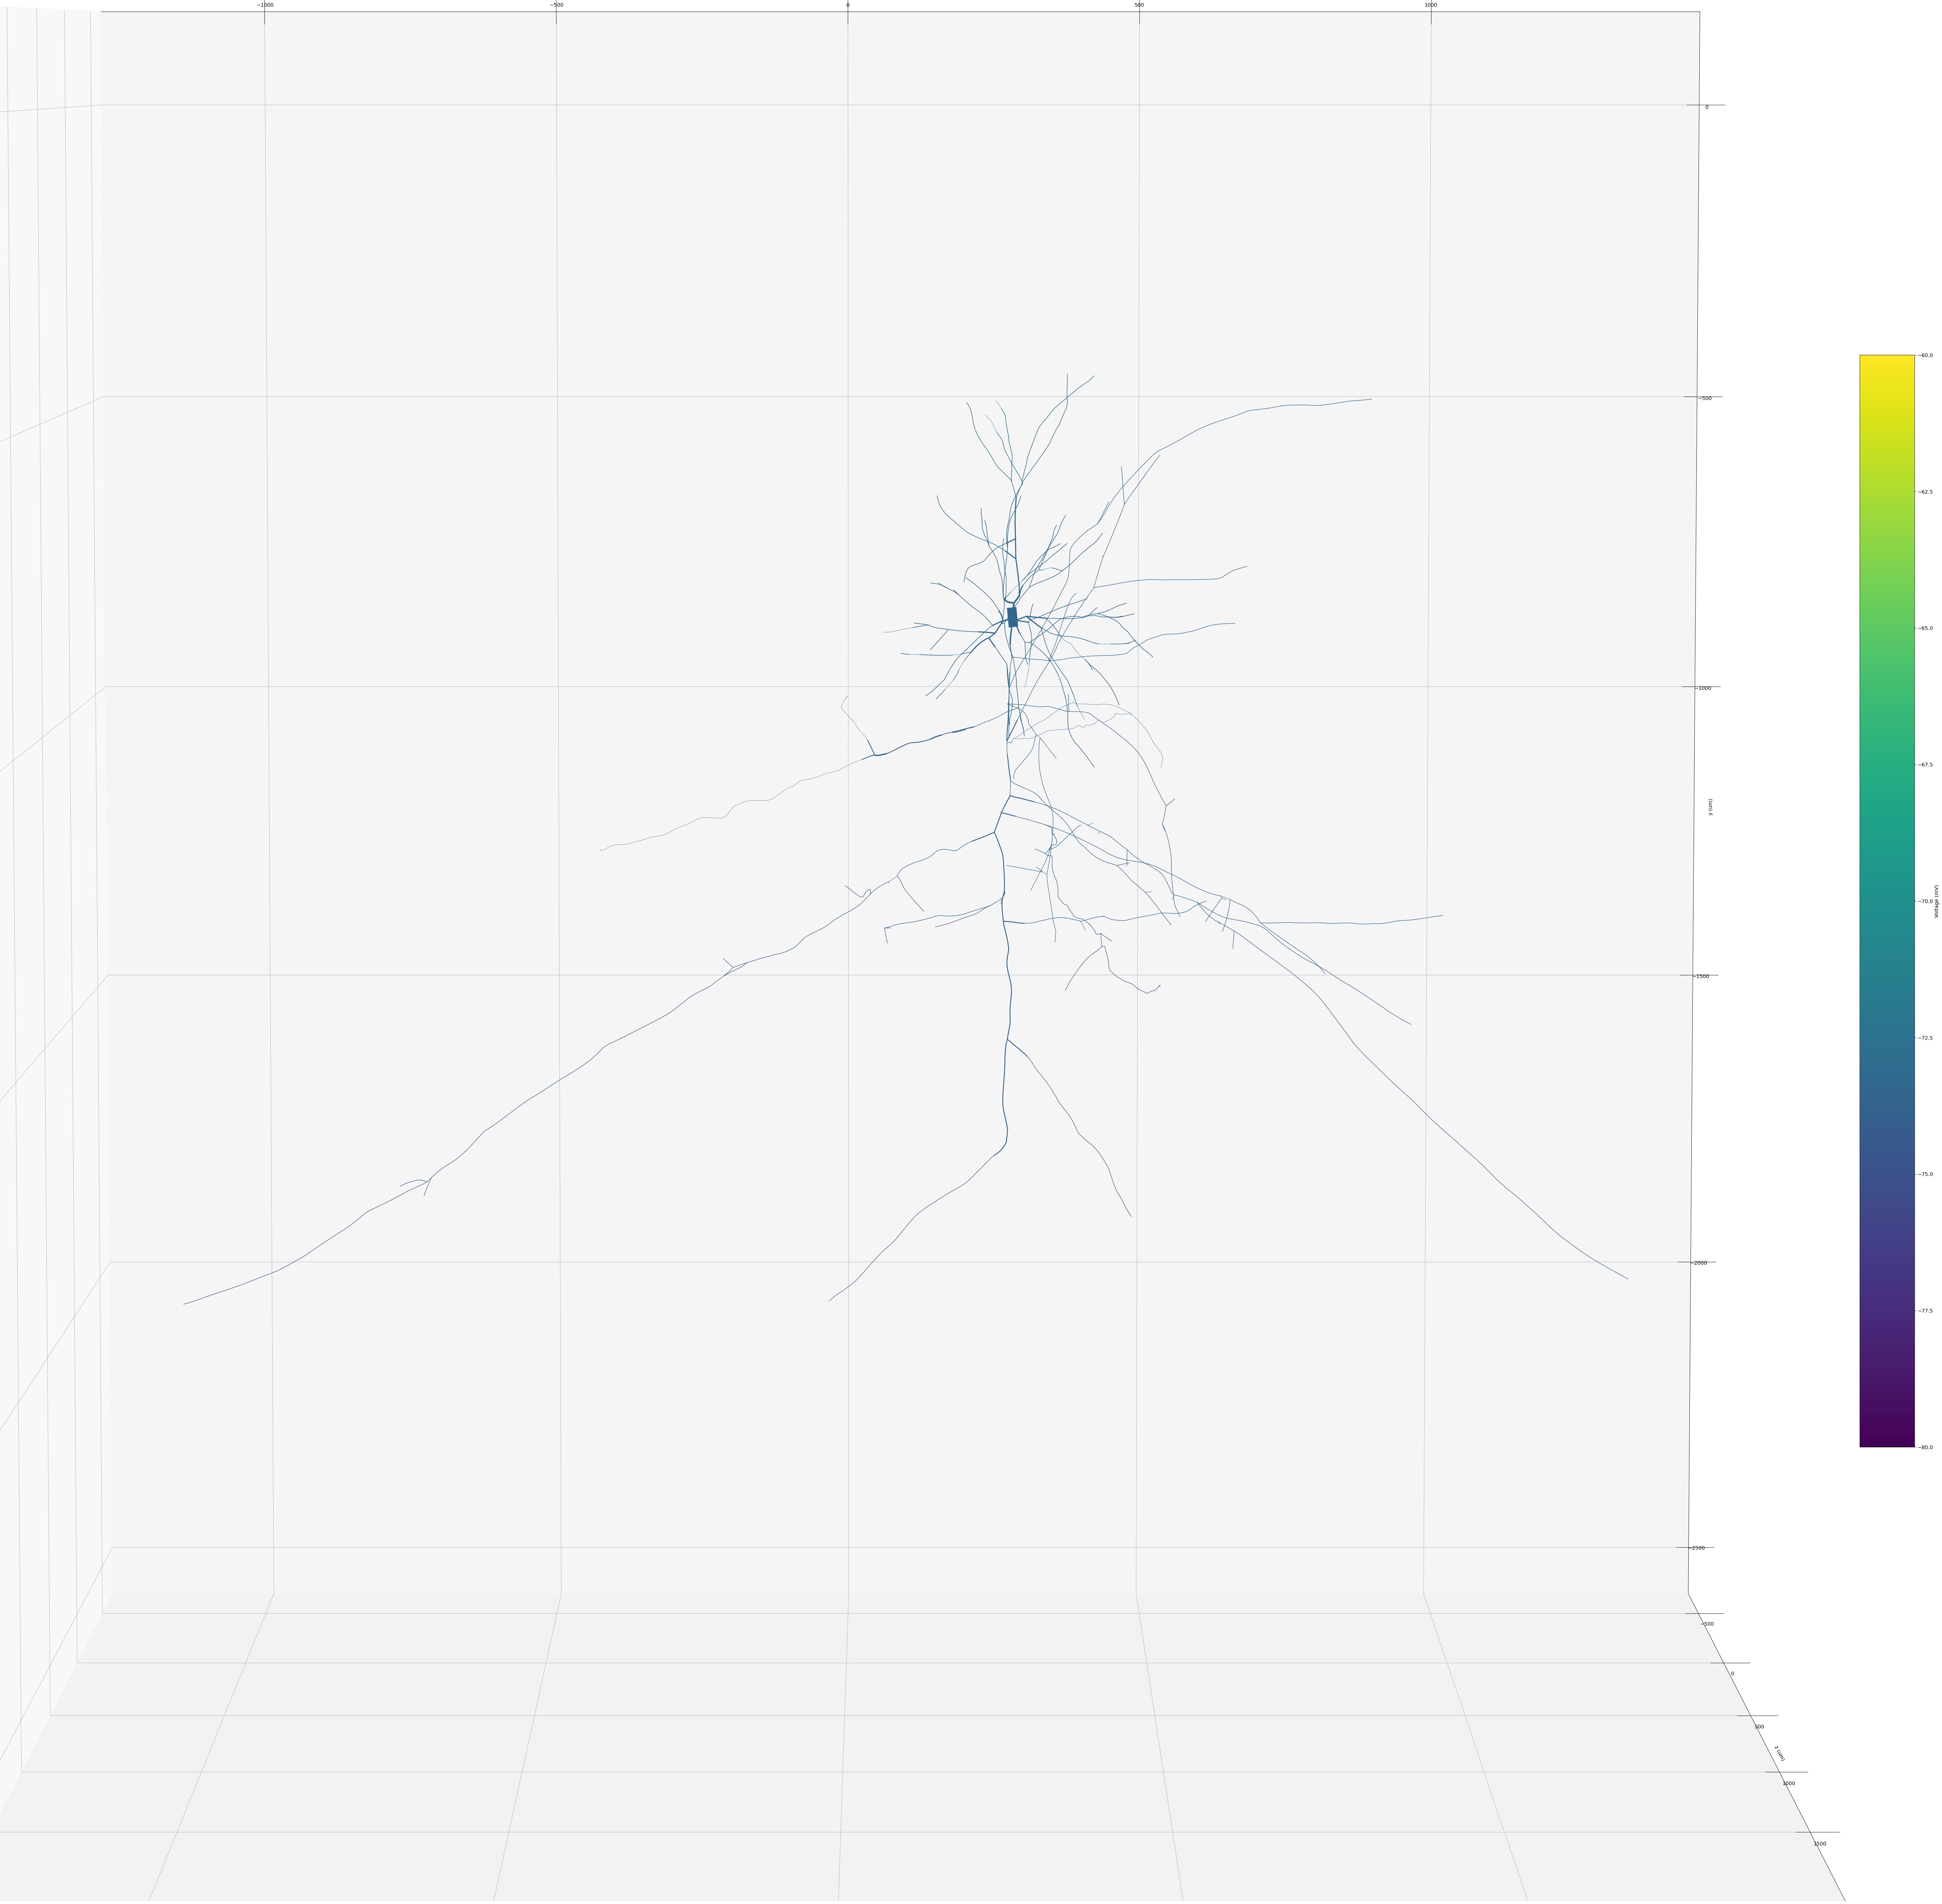

In [32]:
sim.analysis.plotShape(includePre=[cellName], includePost=[cellName], includeAxon=True, showSyns=False, showElectrodes=False,
    cvar= 'voltage', dist=0.6, elev=95, azim=-90, 
    axisLabels=True, synStyle='o', 
    clim= [-80, -60], showFig=False, synSize=2, saveFig=True, figSize=(72,72))